### Podatkovno rudarjenje, 3. domača naloga, 15. 5. 2018

# Napovedovanje vrednosti

## Alen Herceg

Spoznali bomo praktično uporabo enostavnih metod nadzorovanega modeliranja oz.
napovedovanja.  Skupna lastnost vseh omenjenih metod je, da s pomočjo
naključnih spremenljivk (atributov) modelirajo vrednosti posebne spremenljivke,
ki ji pravimo *razred* (v kontekstu uvrščanja v razrede, klasifikacije)
ali *odziv* (v kontekstu regresije). Osnovne razlike med kontekstoma smo
spoznali na predavanjih in vajah.

Praktična cilja, ki ju bomo zasledovali sta:
* modeliranje ocen posameznega uporabnika (odziva) s pomočjo vseh ostalih uporabnikov,
* primerjava metod nadzorovanega modeliranja.

## Podatki

Opis podatkovne zbirke MovieLens 1996-2016 ostaja enak prvi nalogi.

## Predpriprava podatkov

Za potrebe te naloge bomo podatke pripravili na naslednji način:
1. Izberi $m$ filmov z vsaj 100 ogledi.
2. Izberi $n$ uporabnikov, ki si je ogledalo vsaj 100 filmov.
3. Pripravi matriko $X$ velikosti $m \times n$, kjer vrstice predstavljajo filme, stolpci pa uporabnike. Neznane vrednosti zamenjaj z $0$.

Za vsakega od izbranih $n$ uporabnikov bo zgrajen regresijski model, 
katerega cilj bo napoved ocen za filme. 

<table>
    <tr style="background-color: white;">
        <td style="border-right: 1px solid #000;"></td>
        <td></td>
        <td style="border-right: 1px solid #000; border-left: 1px solid #000;">$y^{(0)}$</td>
        <td colspan=3 style="text-align:center;">$X^{(0)}$</td>
    </tr>
    <tr style="border-bottom: 1px solid #000;">
        <td style="border-right: 1px solid #000;"></td>
        <td>Film/uporabnik</td>
        <td style="border-right: 1px solid #000; border-left: 1px solid #000;">$u_0$</td>
        <td>$u_1$</td>
        <td>$u_2$</td>
        <td>$\cdots$</td>
    </tr>
    <tr>
        <td style="border-right: 1px solid #000;">${f_1}$</td>
        <td>Twelve Monkeys (a.k.a. 12 Monkeys) (1995)</td>
        <td style="border-right: 1px solid #000; border-left: 1px solid #000;">0</td>
        <td>0</td>
        <td>2.5</td>
        <td>$\cdots$</td>
    </tr>
    <tr>
        <td style="border-right: 1px solid #000;">${f_2}$</td>
        <td>Dances with  Wolves (1990) </td>
        <td style="border-right: 1px solid #000; border-left: 1px solid #000;">4</td>
        <td>0</td>
        <td>0</td>
        <td>$\cdots$</td>
    </tr>
    <tr>
        <td style="border-right: 1px solid #000;">${f_3}$</td>
        <td>Apollo 13 (1995)</td>
        <td style="border-right: 1px solid #000; border-left: 1px solid #000;">0</td>
        <td>2</td>
        <td>0</td>
        <td>$\cdots$</td>
    </tr>
    <tr>
        <td style="border-right: 1px solid #000;">${f_4}$</td>
        <td>Sixth Sense, The (1999)</td><td style="border-right: 1px solid #000; border-left: 1px solid #000;">3</td>
        <td>0</td>
        <td>4</td>
        <td>$\cdots$</td>
    </tr>
    <tr>
        <td style="border-right: 1px solid #000;">$\cdots$</td>
        <td>$\cdots$</td>
        <td style="border-right: 1px solid #000; border-left: 1px solid #000;">$\cdots$</td>
        <td>$\cdots$</td>
        <td>$\cdots$</td>
        <td>$\cdots$</td>
    </tr>
</table>

<table>
    <tr style="background-color: white;">
        <td style="border-right: 1px solid #000;"></td>
        <td></td>
        <td style="border-right: 1px solid #000; border-left: 1px solid #000;">$y^{(1)}$</td>
        <td colspan=3 style="text-align:center;">$X^{(1)}$</td>
    </tr>
    <tr style="border-bottom: 1px solid #000;">
        <td style="border-right: 1px solid #000;"></td>
        <td>Film/uporabnik</td>
        <td style="border-right: 1px solid #000; border-left: 1px solid #000;">$u_1$</td>
        <td>$u_0$</td>
        <td>$u_2$</td>
        <td>$\cdots$</td>
    </tr>
    <tr>
        <td style="border-right: 1px solid #000;">${f_1}$</td>
        <td>Twelve Monkeys (a.k.a. 12 Monkeys) (1995)</td>
        <td style="border-right: 1px solid #000; border-left: 1px solid #000;">0</td>
        <td>0</td>
        <td>2.5</td>
        <td>$\cdots$</td>
    </tr>
    <tr>
        <td style="border-right: 1px solid #000;">${f_2}$</td>
        <td>Dances with  Wolves (1990) </td>
        <td style="border-right: 1px solid #000; border-left: 1px solid #000;">0</td>
        <td>4</td>
        <td>0</td>
        <td>$\cdots$</td>
    </tr>
    <tr>
        <td style="border-right: 1px solid #000;">${f_3}$</td>
        <td>Apollo 13 (1995)</td>
        <td style="border-right: 1px solid #000; border-left: 1px solid #000;">2</td>
        <td>0</td>
        <td>0</td>
        <td>$\cdots$</td>
    </tr>
    <tr>
        <td style="border-right: 1px solid #000;">${f_4}$</td>
        <td>Sixth Sense, The (1999)</td><td style="border-right: 1px solid #000; border-left: 1px solid #000;">0</td>
        <td>3</td>
        <td>4</td>
        <td>$\cdots$</td>
    </tr>
    <tr>
        <td style="border-right: 1px solid #000;">$\cdots$</td>
        <td>$\cdots$</td>
        <td style="border-right: 1px solid #000; border-left: 1px solid #000;">$\cdots$</td>
        <td>$\cdots$</td>
        <td>$\cdots$</td>
        <td>$\cdots$</td>
    </tr>
</table>

Razdelitev podatkov za model uporabnika $u_0$ (zgoraj) in uporabnika $u_1$ (spodaj).

## Vprašanja

<ol>
<li>(100%) **Regresija**. Za vsakega od uporabnikov postavite regresijski model. Uporabite eno ali več metod za učenje regresijskih modelov (linearna regresija, Ridge, Lasso, itd.). <br>
    Za vsakega od $n$ uporabnikov izberite ustrezni stolpec v matriki podatkov. Za uporabnika $i$ imamo torej
    <ul>
    <li> Vektor odziva $y^{(i)}$,</li>
    <li> Matriko podatkov $X^{(i)}$, ki vsebuje vse stolpce *razen* $i$.</li>
    </ul>
    
Za lažjo predstavo si oglej zgornji tabeli. Nekajkrat (npr. trikrat) ponovite postopek preverjanja s pomočjo učne in testne množice:

    <ol type="a">
    <li> Množico filmov, ki si jih je uporabnik ogledal, *naključno* razdelite v razmerju 75% (učna množica) in 25% (testna množica).</li>
    <li> Naučite regresijski model na učni množici<br> (izberite ustrezne vrstice v $X$ in $y$).</li>
    <li> Ovrednotite model na testni množici <br> (ponovno izberite ustrezne vrstice v $X$ in $y$).</li>
    </ol>
Oceno vrednotenja nato delite s številom poizkusov, da dobite končno oceno.<br>

Poročajte o uspešnosti vašega modela. Pri tem se osredotočite na naslednja vprašanja:
<ul>
    <li> Utemeljite ustrezno mero vrednotenja. Ali model dobro napoveduje ocene?
    <li> Z izbrano mero ocenite modele za vseh $n$ uporabnikov.
</ul>

</li>


<li>
(Bonus 15%) Ustvarite novega uporabnika, ki predstavlja vaše ocene
filmov. Ocenite nekaj filmov po lastnem okusu in preverite, kako modeli ocenijo neizbrane filme.
Ali se vam zdijo napovedi primerne? 
</li>
</ol>

## Zapiski

Implementacijo, opis in vrednotenje metod za nadzorovanjo učenje vsebujejo knjižnice `sklearn` ali `Orange`.

In [302]:
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from scipy.stats import pearsonr
import csv
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('PR.mplstyle')

Text(0,0.5,'MSE')

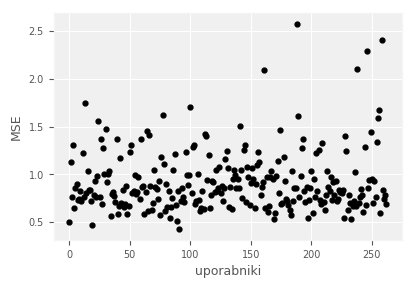

In [393]:
userY = {}
movieY = {}
userN = []
movieM = []
readerRatings = csv.DictReader(open('ratings.csv', 'rt', encoding='utf-8'))
for row in readerRatings:
    a = int(row["userId"])
    b =int(row["movieId"])
    if a in userY:
        userY[a] += 1
    else:
        userY[a] = 1
    if b in movieY:
        movieY[b] += 1
    else:
        movieY[b] = 1
#pridobivanje uporabnikov, ki so si ogledali vsaj 100 filmov
for key in userY:
    if userY[key] >= 100:
        userN.append(key)
userN.sort()
#pridobivanje filmov, ki imajo vsaj 100 ogledov
for key in movieY:
    if movieY[key] >= 100:
        movieM.append(key)
movieM.sort()
#ustvarimo novo matriko in jo napolnimo
matrix = np.zeros((len(movieM),len(userN))) 
readerRatings = csv.DictReader(open('ratings.csv', 'rt', encoding='utf-8'))
for row in readerRatings:
    a = int(row["userId"])
    b =int(row["movieId"])
    c = float(row["rating"])
    if a in userN:
        if b in movieM:
            matrix[movieM.index(b)][userN.index(a)] = c
#razdelimo na učne in testne množice za vsakega uporabnika
random.seed(9001)
msef = []
maef = []
evf = []
for i in range(0,len(userN)):
    mse = []
    mae = []
    ev = []
    y = matrix[:,[i]]
    data_train_nu, data_test_use, group_train_nu, group_test_use = train_test_split(y,matrix, test_size=0.25, random_state=random.randint(0,300))
#za vsakega uporabnika učimo model 6-krat in shranimo dobljene rezultate v končno tabelo za vsakega uporabnika
    for t in range(0,6):
        data_train_use, data_test_nu, group_train_use, group_test_nu = train_test_split(y,matrix, test_size=0.25, random_state=random.randint(0,300))
        model = Lasso(alpha=1.7)
        model.fit(group_train_use,data_train_use)
        pred = model.predict(group_test_use)
        mae.append(mean_absolute_error(data_test_use,pred))
        mse.append(mean_squared_error(data_test_use,pred))
        ev.append(r2_score(data_test_use,pred)*100)
    msef.append(sum(mse)/6)
    maef.append(sum(mae)/6)
    evf.append(sum(ev)/6)
#vizualizacija
#srednja kvadratična napaka
plt.figure()
plt.plot(msef,"k.")
plt.xlabel("uporabniki")
plt.ylabel("MSE")

Ko smo izračunali vse potrebno za vsakega uporabnika vidimo, da za večino uporabnikov je bil MSE okoli 0.8 kar jedosti dober rezultat.

Text(0,0.5,'MAE')

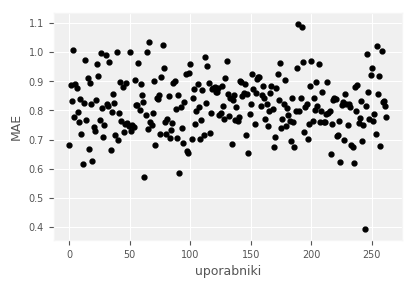

In [394]:
#srednja absolutna napaka
plt.plot(maef,"k.")
plt.xlabel("uporabniki")
plt.ylabel("MAE")

Pri MAE pa opazimo, da je večino uporabnikov imelo MAE med 1 in 0.6, redki so pa šli čez ali pod to nekako normo.

Text(0,0.5,'EV')

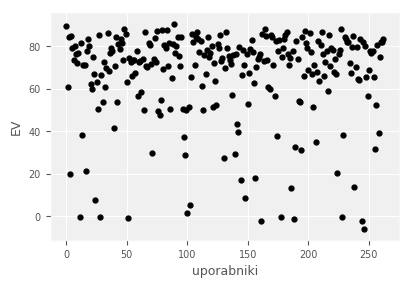

In [395]:
# delež pojasnene variance
plt.plot(evf,"k.")
plt.xlabel("uporabniki")
plt.ylabel("EV")

Tukaj pri  deležu pojasnene variance pa je večino uporabnikov bilo ocenjeno okoli 80%, kar je zelo dobro. To pomeni, da modeli dobro ocenjujejo.

Na koncu celotnega preiskovanje se je vidlo, da modeli zelo dobro delujejo in so zelo koristni in priročni pri ocenjevanju.